# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

from glob import glob # serve para listar os arquivos das imagens

# Bibliotecas para imagens
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Organising our Data

In [11]:
dataset_dir = os.path.join(os.getcwd(), 'skin_search')


dataset_test_dir = os.path.join(dataset_dir, 'test')
dataset_test_dry_len = len(os.listdir(os.path.join(dataset_test_dir, 'dry')))
dataset_test_normal_len = len(os.listdir(os.path.join(dataset_test_dir, 'normal')))
dataset_test_oily_len = len(os.listdir(os.path.join(dataset_test_dir, 'oily')))

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_dry_len = len(os.listdir(os.path.join(dataset_train_dir, 'dry')))
dataset_train_normal_len = len(os.listdir(os.path.join(dataset_train_dir, 'normal')))
dataset_train_oily_len = len(os.listdir(os.path.join(dataset_train_dir, 'oily')))

dataset_validation_dir = os.path.join(dataset_dir, 'valid')
dataset_validation_dry_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dry')))
dataset_validation_normal_len = len(os.listdir(os.path.join(dataset_validation_dir, 'normal')))
dataset_validation_oily_len = len(os.listdir(os.path.join(dataset_validation_dir, 'oily')))


print('               QUANTIDADE DE IMAGENS              ')
print('\n--------------------------------------------------')
print('Test dry: %s' % dataset_test_dry_len)
print('Test normal: %s' % dataset_test_normal_len)
print('Test oily: %s' % dataset_test_oily_len)
print('--------------------------------------------------')
print('Train dry: %s' % dataset_train_dry_len)
print('Train normal: %s' % dataset_train_normal_len)
print('Train oily: %s' % dataset_train_oily_len)
print('--------------------------------------------------')
print('Validation dry: %s' % dataset_validation_dry_len)
print('Validation normal: %s' % dataset_validation_normal_len)
print('Validation oily: %s' % dataset_validation_oily_len)

               QUANTIDADE DE IMAGENS              

--------------------------------------------------
Test dry: 35
Test normal: 59
Test oily: 40
--------------------------------------------------
Train dry: 652
Train normal: 1105
Train oily: 1000
--------------------------------------------------
Validation dry: 71
Validation normal: 111
Validation oily: 80


# Image preprocessing for model training

In [12]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
img_shape = image_size + (image_color_channel,)

batch_size = 32 # quantidade de features q eu vou trazer por vez do meu dataset
epochs = 30 # número de vezes em que eu vou passar pelo meu dataset inteiro
learning_rate = 0.0001

class_names = ['dry', 'normal', 'oily']

In [13]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 134 files belonging to 3 classes.


In [14]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2757 files belonging to 3 classes.


In [15]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 262 files belonging to 3 classes.


## Ploting our dataset

<Figure size 640x480 with 0 Axes>

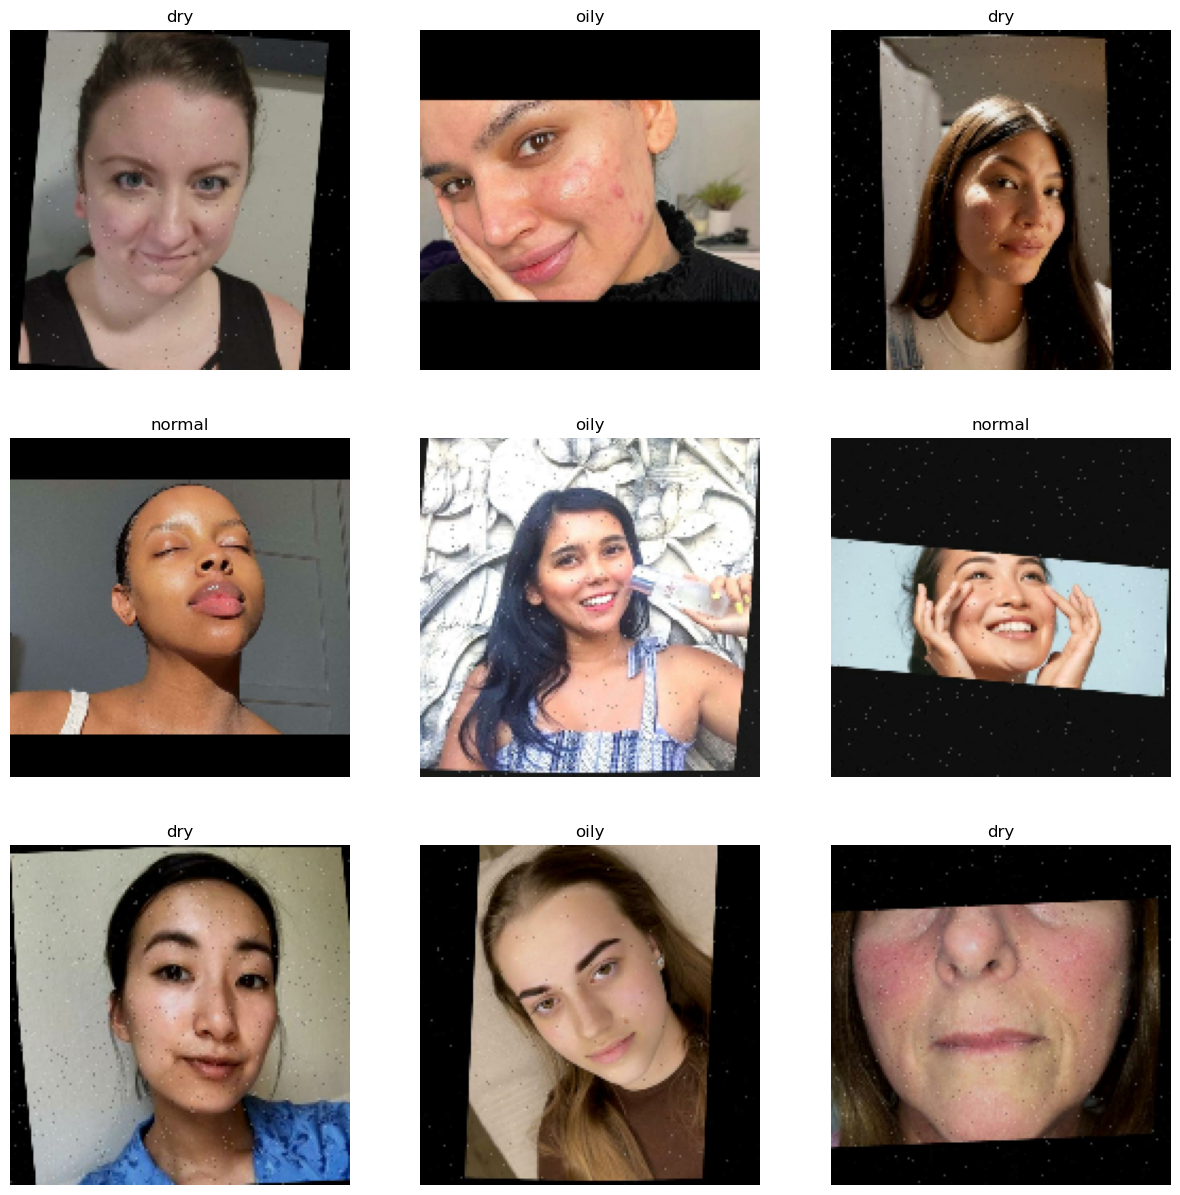

In [16]:
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

plot_dataset(dataset_train)

## Normalising and treating

In [51]:
# This will transform the images in numeric
def output(dataset):
    data_out = dataset.as_numpy_iterator().next()
    return data_out

In [52]:
test = output(dataset_test)
train =  output(dataset_train)
validation =  output(dataset_validation)

In [53]:
treino_entrada = train[0]
treino_saida = train[1]

teste_entrada = test[0]
teste_saida = test[1]

In [54]:
from sklearn.preprocessing import MinMaxScaler ## Need to see how to treat this with 4 dimensions

scaler = MinMaxScaler()
treino_entrada = scaler.fit_transform(treino_entrada)
treino_entrada

ValueError: Found array with dim 4. MinMaxScaler expected <= 2.

# Creating a Machine Learning Supervised Learning model - type Image Classification¶

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1.0 / image_color_channel_size, 
                              input_shape=img_shape),
    
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(3, activation = 'softmax'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          76,803 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,399 (392.18 KB)

 Trainable params: 100,399 (392.18 KB)

 Non-trainable params: 0 (0.00 B)

## Training

Compiling

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [ ]:
historico =modelo.fit(treino_entrada, treino_saida,
           epochs=epochs,
                     validation_split=0.3)

In [32]:
def plot_data_set_predictions(dataset):

    features, labels = output(dataset)

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < -1, 0, 2)

    print('labels:       %s' % labels)
    print('predictions:  %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15,15))

    for i in range (9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

labels:       [0 0 2 1 2 1 1 1 1 0 1 2 1 1 0 0 1 2 2 2 2 1 0 0 2 2 1 2 0 2 2 1]
predictions:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<Figure size 640x480 with 0 Axes>

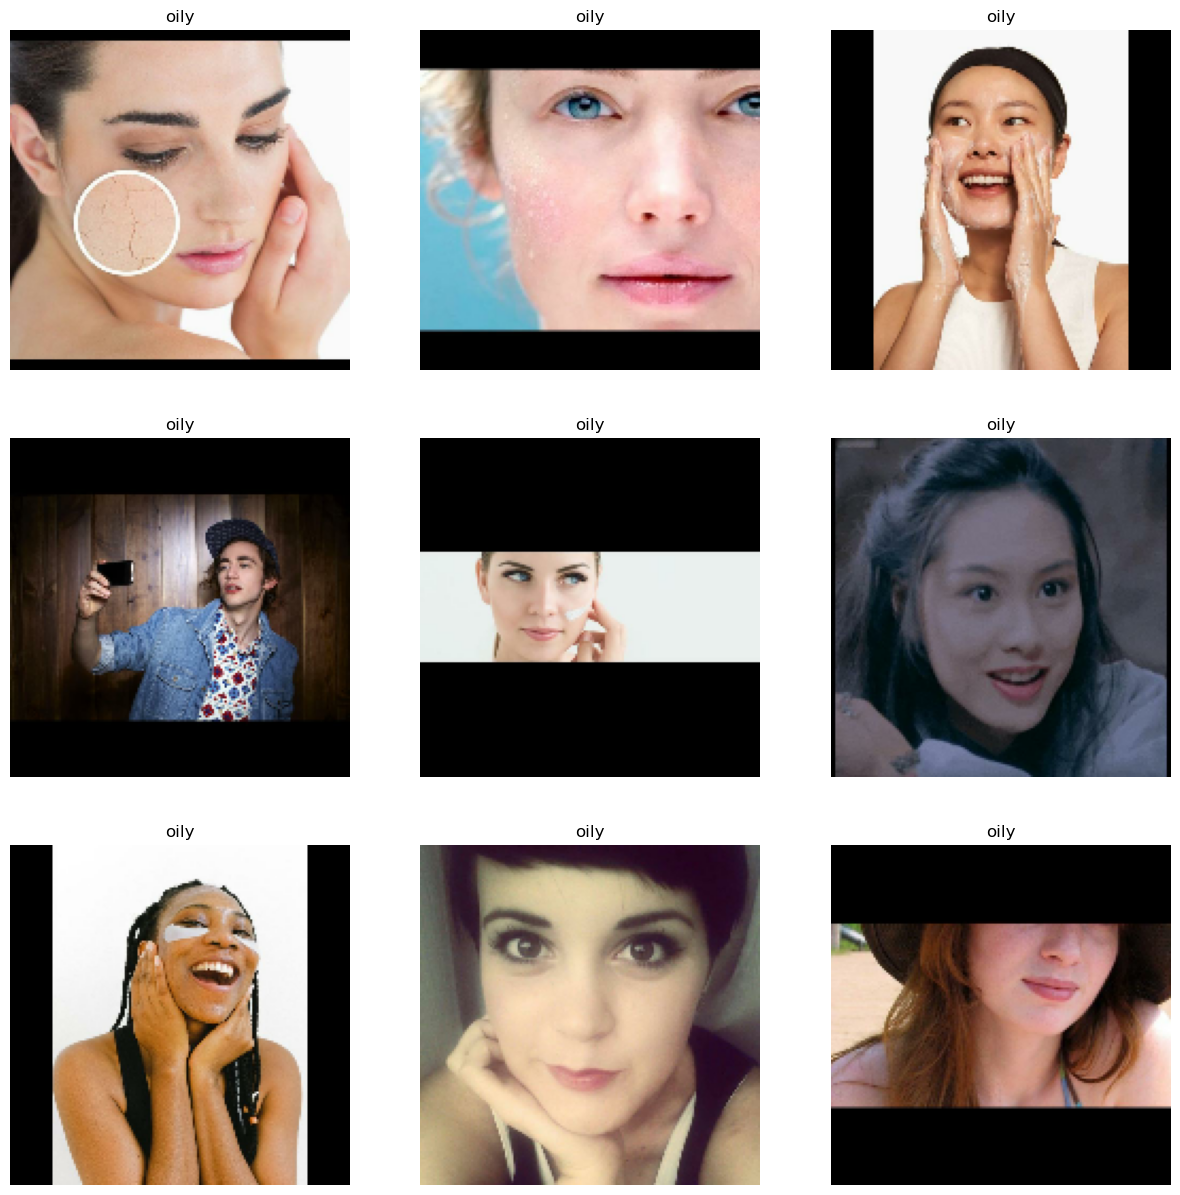

In [33]:
plot_data_set_predictions(dataset_test)